In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [2]:
credito = pd.read_csv("credit.csv")
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [3]:
previsores = credito.iloc[:,0:20].values
previsores

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

In [4]:
classe = credito.iloc[:,20].values

In [5]:
labelencoder = LabelEncoder()

In [6]:
transform = [0,2,3,5,6,8,9,11,13,14,16,18,19]

In [7]:
for i in transform:
    previsores[:,i] = labelencoder.fit_transform(previsores[:,i])

In [8]:
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [10]:
len(x_train), len(x_test), len(y_train), len(y_test)

(700, 300, 700, 300)

In [11]:
print(x_train[0])

[1 24 1 6 11938 3 0 2 3 0 3 3 39 1 1 2 0 2 1 1]


In [12]:
naive_bayes = GaussianNB()

In [13]:
naive_bayes.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
previsoes = naive_bayes.predict(x_test)

In [15]:
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [16]:
confusao = confusion_matrix(y_test, previsoes)

In [17]:
print(confusao)

[[ 41  45]
 [ 42 172]]


In [18]:
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.71

In [19]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.29000000000000004

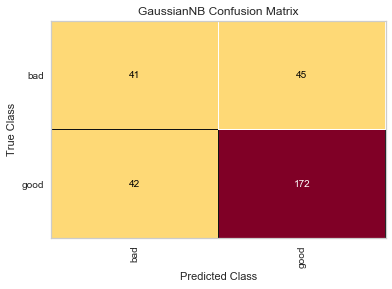

In [20]:
v = ConfusionMatrix(GaussianNB())
v.fit(x_train, y_train)
v.score(x_test, y_test)
v.poof()

In [21]:
novo_credito = pd.read_csv("novocredit.csv")

In [22]:
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [23]:
novo_credito = novo_credito.iloc[:,0:20].values

In [24]:
for i in transform:
    novo_credito[:,i] = labelencoder.fit_transform(novo_credito[:,i])

In [25]:
novo_credito

array([[0, 12, 0, 0, 804, 0, 0, 4, 0, 0, 4, 0, 38, 0, 0, 1, 0, 1, 0, 0]],
      dtype=object)

In [26]:
predicao = naive_bayes.predict(novo_credito)

In [27]:
print(predicao)

['good']
